<a href="https://colab.research.google.com/github/Akansha2004pandey/CHSW_Projects/blob/main/capstone_projects/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install datasets

from datasets import load_dataset

# Load the IMDB dataset
imdb_data = load_dataset("imdb")

# Access train, test, and unsupervised data
print(imdb_data["train"][0])  # First training sample


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:

train_data=imdb_data['train']


In [ ]:
data=pd.DataFrame(train_data)

In [ ]:
data.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [ ]:
data['label'].unique()

array([0, 1])

In [ ]:
print(data['text'].isna().sum())

0


In [ ]:
data['text']=data['text'].astype(str)


# Check the result
print(data.head())

                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


In [ ]:
df2=pd.DataFrame(imdb_data['test'])
result = pd.concat([data, df2], ignore_index=True)

In [ ]:
result.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [ ]:
result['text']=result['text'].astype(str)

In [ ]:
reviews=result['text']

In [ ]:
result['text']=result['text'].str.lower()

In [ ]:
import re
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
result['text']=result['text'].apply(remove_html)

In [ ]:
result['text'].head()

,text
0,i rented i am curious-yellow from my video sto...
1,"""i am curious: yellow"" is a risible and preten..."
2,if only to avoid making this type of film in t...
3,this film was probably inspired by godard's ma...
4,"oh, brother...after hearing about this ridicul..."


In [ ]:
import string
punc_to_remove=string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',punc_to_remove))
result['text']=result['text'].apply(remove_punctuation)

In [ ]:
result['text'].head()

,text
0,i rented i am curiousyellow from my video stor...
1,i am curious yellow is a risible and pretentio...
2,if only to avoid making this type of film in t...
3,this film was probably inspired by godards mas...
4,oh brotherafter hearing about this ridiculous ...


In [ ]:
import nltk
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
stopwords=set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split()if word not in stopwords])

result['text']=result['text'].apply(remove_stopwords)



In [ ]:
result['text'].head()

,text
0,rented curiousyellow video store controversy s...
1,curious yellow risible pretentious steaming pi...
2,avoid making type film future film interesting...
3,film probably inspired godards masculin fémini...
4,oh brotherafter hearing ridiculous film umptee...


In [ ]:
result['text'] = result['text'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
A=result['text']
B=result['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(A,B,test_size=0.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
X_train_tfidf

<40000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2652432 stored elements in Compressed Sparse Row format>

In [ ]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500)  # Increase max_iter if convergence issues occur
log_reg.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = log_reg.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
result.shape

(50000, 2)

In [ ]:
result.columns

Index(['text', 'label'], dtype='object')

In [ ]:
result['text'].shape

(50000,)

In [ ]:
# Split data into training and testing sets

X_train, X_test,Y_train,Y_test = train_test_split(result['text'],result['label'], test_size=0.2, random_state=42)

In [ ]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(result['text'])
X_train=pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen=200)
X_test=pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=200)

In [ ]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  705,  190, 1254, 1907, 1465, 1540, 2121,  578,
        686,   34,   31, 1075,  759,  437,  736,  754,  516,    9,  247,
        860,   78,    6,  754,  686, 2054,   41, 13

In [ ]:
LSTM_model=Sequential()
LSTM_model.add(Embedding(input_dim=5000,output_dim=128,input_shape=(200,)))
LSTM_model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
LSTM_model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
LSTM_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
LSTM_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = LSTM_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 525ms/step - accuracy: 0.7601 - loss: 0.4745 - val_accuracy: 0.8687 - val_loss: 0.3141
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 341s 564ms/step - accuracy: 0.8917 - loss: 0.2755 - val_accuracy: 0.8221 - val_loss: 0.3864
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 304s 528ms/step - accuracy: 0.9022 - loss: 0.2521 - val_accuracy: 0.8774 - val_loss: 0.2999
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 338s 561ms/step - accuracy: 0.9121 - loss: 0.2228 - val_accuracy: 0.8691 - val_loss: 0.3145
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 303s 523ms/step - accuracy: 0.9266 - loss: 0.1900 - val_accuracy: 0.8698 - val_loss: 0.3511


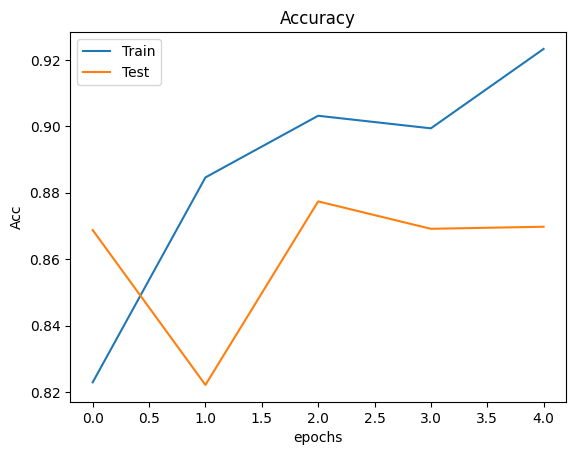

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = LSTM_model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.8679 - loss: 0.3682
Test Loss: 0.3661629259586334
Test Accuracy: 0.8675000071525574


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Replace with your desired path on Google Drive
model_save_path = '/content/drive/MyDrive/sentiment/lstm_model.h5'

# Save the model to the specified path
LSTM_model.save(model_save_path)


In [ ]:
import json

# Assuming the tokenizer is already created
tokenizer_json = tokenizer.to_json()

# Specify the path on Google Drive where you want to save the tokenizer JSON
tokenizer_save_path = '/content/drive/MyDrive/sentiment/tokenizer.json'

# Save the tokenizer JSON to the specified path on Google Drive
with open(tokenizer_save_path, 'w') as json_file:
    json.dump(tokenizer_json, json_file)


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/sentiment/lstm_model.h5')


In [ ]:
loaded_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Evaluate the model
loss, accuracy = loaded_model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 149ms/step - accuracy: 0.8679 - loss: 0.3682
Test Loss: 0.3661629259586334, Test Accuracy: 0.8675000071525574


In [ ]:
import tensorflow as tf

# Load your model
model = tf.keras.models.load_model('/content/drive/MyDrive/sentiment/lstm_model.h5')

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable experimental resource variables flag
converter.experimental_enable_resource_variables = True

# Allow Select TF Ops (for unsupported operations)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Disable lowering tensor list operations
converter._experimental_lower_tensor_list_ops = False

# Convert the model
tflite_model = converter.convert()

# Save the model as a .tflite file
with open('/content/drive/MyDrive/sentiment/lstm_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted and saved as .tflite")


Saved artifact at '/tmp/tmp_1h_2wdj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139129743730896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139129743730512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139129743728208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139129743727824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139129743724368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139129743729360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139129743726096: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted and saved as .tflite


In [ ]:
!pip install tflite-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/sentiment/lstm_model.tflite")

# Allocate tensors
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare a sample input (replace with real data)
sample_input = np.expand_dims(X_test[0], axis=0).astype(np.float32)  # Add batch dimension to shape (1, 200)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], sample_input)

# Run inference
interpreter.invoke()

# Get output
output = interpreter.get_tensor(output_details[0]['index'])
print(output)


[[0.01406229]]


In [ ]:
prediction = np.argmax(output)
print(f"Predicted Class: {prediction}")


Predicted Class: 0
